<a href="https://colab.research.google.com/github/mananjain0220/ML-and-Computer-Vision/blob/main/Correct_ResNet_Model_27_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Parcel Damage Classification/

/content/gdrive/MyDrive/Parcel Damage Classification


In [ ]:
!ls

README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from glob import glob
from keras.applications.resnet import ResNet50, preprocess_input
#from tensorflow.keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.backend import clear_session

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Function to check if file is an image
# def is_image(file_name):
#     image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
#     return any(file_name.lower().endswith(ext) for ext in image_extensions)

# # Paths
# base_dir = '/content/gdrive/MyDrive/OLD DATASET WHICH IS MERGED'
# categories = ['Damaged', 'Undamaged']
# output_dir = '/content/gdrive/MyDrive/OLD DATASET WHICH IS MERGED/train_test_split data'

# # Ratios for splitting
# train_ratio = 0.7
# validation_ratio = 0.15
# test_ratio = 0.15

# # Create output directories
# for category in categories:
#     for split in ['train', 'test', 'val']:
#         os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# # Splitting and copying files
# for category in categories:
#     src_dir = os.path.join(base_dir, category)
#     files = [f for f in os.listdir(src_dir) if is_image(f)]

#     # Split files
#     train_files, test_files = train_test_split(files, test_size=(1 - train_ratio))
#     val_files, test_files = train_test_split(test_files, test_size=test_ratio/(test_ratio + validation_ratio))

#     # Copy files to their respective directories
#     for file in train_files:
#         shutil.copy(os.path.join(src_dir, file), os.path.join(output_dir, 'train', category))
#     for file in test_files:
#         shutil.copy(os.path.join(src_dir, file), os.path.join(output_dir, 'test', category))
#     for file in val_files:
#         shutil.copy(os.path.join(src_dir, file), os.path.join(output_dir, 'val', category))

# print("Data split and copied successfully.")


Data split and copied successfully.


In [ ]:
train_path = '/content/gdrive/MyDrive/Parcel Damage Classification/train'
validate_path = '/content/gdrive/MyDrive/Parcel Damage Classification/valid'
test_path = '/content/gdrive/MyDrive/Parcel Damage Classification/test'

In [ ]:
#to get number of files

image_files = glob(train_path+ '/*/*.jp*g')
valid_image_files = glob(validate_path+ '/*/*.jp*g')

In [ ]:
# to get number of classes

folders = glob(train_path+ '/*')

In [ ]:
# After creating the train_generator
class_indices = train_generator.class_indices
print("Class Indices: ", class_indices)


Class Indices:  {'damagedpackages': 0, 'undamagedpackages': 1}


# New Section

In [ ]:

# To invert the indices and class names
idx_to_class = {v: k for k, v in class_indices.items()}
print("Index to Class Mapping: ", idx_to_class)


Index to Class Mapping:  {0: 'damagedpackages', 1: 'undamagedpackages'}


## USING EFFICIENT NET

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

## OLD MODEL

In [ ]:
# # Load ResNet pre-trained model without the top layer (head)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_size + [3])


94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.layers import Dropout

base_model = base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.)(x)  # Add dropout of 50%
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
predictions = Dense(1, activation='sigmoid')(x)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# # Freeze all layers in the base model
# for layer in base_model.layers:
#   layer.trainable = False

In [ ]:
# # Unfreeze some top layers for fine-tuning
# for layer in base_model.layers[-15:]:
#    layer.trainable = True


In [ ]:
# Combine base model with the new head
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
#gives structure of the model
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
   train_generator,
   steps_per_epoch=train_generator.samples // batch_size,
   validation_data=validation_generator,
   validation_steps=validation_generator.samples // batch_size,
   epochs=20,
   callbacks=[reduce_lr, early_stopping])  # You can adjust the number of epochs


Epoch 1/20
29/29 [==============================] - 362s 11s/step - loss: 0.6358 - accuracy: 0.7341 - val_loss: 8.4582 - val_accuracy: 0.4911 - lr: 0.0010
Epoch 2/20
29/29 [==============================] - 23s 803ms/step - loss: 0.4561 - accuracy: 0.7935 - val_loss: 11.5035 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 3/20
29/29 [==============================] - 22s 745ms/step - loss: 0.4767 - accuracy: 0.7838 - val_loss: 48.9017 - val_accuracy: 0.5134 - lr: 0.0010
Epoch 4/20
29/29 [==============================] - 25s 852ms/step - loss: 0.4493 - accuracy: 0.8032 - val_loss: 1.9404 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 5/20
29/29 [==============================] - 24s 833ms/step - loss: 0.4044 - accuracy: 0.8249 - val_loss: 6.6157 - val_accuracy: 0.6696 - lr: 0.0010
Epoch 6/20
29/29 [==============================] - 22s 757ms/step - loss: 0.4537 - accuracy: 0.7989 - val_loss: 1.6059 - val_accuracy: 0.5223 - lr: 0.0010
Epoch 7/20
29/29 [==============================] - 22s 748ms/s

In [ ]:
# Save the entire model to a .keras file.
model.save('/content/gdrive/MyDrive/OLD DATASET WHICH IS MERGED/Resnet_model.h5')  # Specify the filename with .h5 extension



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


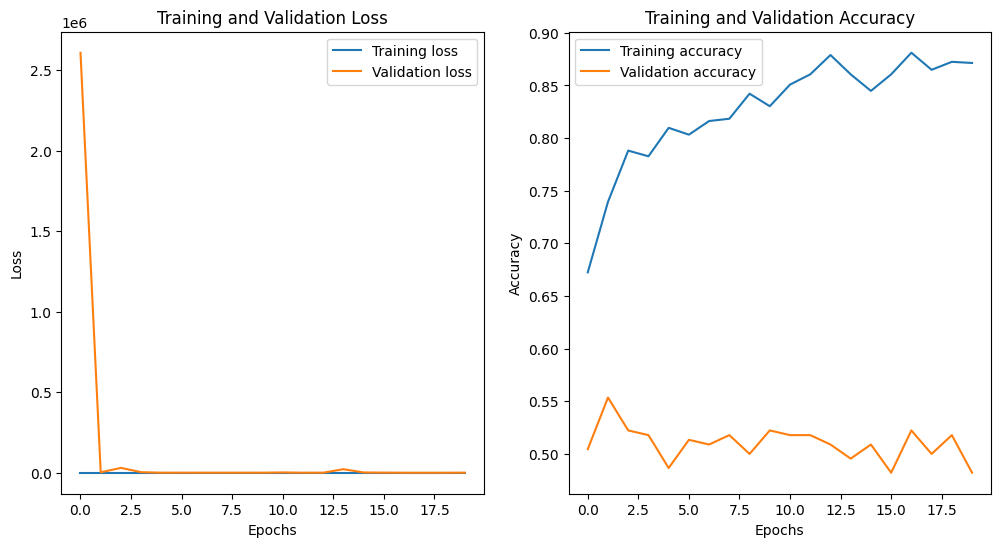

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
history_dict = history.history

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
%cd /content/gdrive/MyDrive/testing_and_saved_model/Resnet_model.keras

[Errno 20] Not a directory: '/content/gdrive/MyDrive/testing_and_saved_model/Resnet_model.keras'
/content/gdrive/MyDrive/damage_processing_dataset


In [ ]:
!ls

path_to_my_model.h5  Training  Validation


In [ ]:
from tensorflow.keras.models import load_model


loaded_model = load_model('/content/gdrive/MyDrive/OLD DATASET WHICH IS MERGED/Resnet_model.h5')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import os



In [ ]:
def load_and_preprocess_images(folder_path):
    images = []
    image_names = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        try:
            # Load the image (using the target size for your model, e.g., 224x224 for VGG16)
            img = load_img(img_path, target_size=(224, 224))

            # Convert the image to an array
            img_array = img_to_array(img)

            # Preprocess the image for your model
            img_array = preprocess_input(img_array)

            # Append to your list
            images.append(img_array)
            image_names.append(img_name)
        except Exception as e:
            print(f"Warning: Could not process image file {img_name} - {e}")

    # Convert the list of images to a batch of size (n_images, 224, 224, 3)
    images_batch = np.array(images)
    return images_batch, image_names

folder_path = '/content/gdrive/MyDrive/Parcel Damage Classification/test/undamagedpackages'  # Update with the path to your images
images_batch, image_names = load_and_preprocess_images(folder_path)



In [ ]:
# ... [Your existing imports and function definitions]


# Assuming 'Damaged' is labeled as 0 and 'Undamaged' as 1
class_indices = {1: 'undamagedpackages', 0: 'damagedpackages'}

# Make predictions
predictions = model.predict(images_batch)

# For binary classification with a sigmoid output layer
predicted_classes = (predictions > 0.5).astype(int)

# Convert these predictions to labels
for i, name in enumerate(image_names):
    # Get the predicted class index
    class_idx = predicted_classes[i][0]  # Adjust indexing based on the shape of your predictions
    # Map the class index to the class name
    class_name = class_indices[class_idx]
    print(f"Image: {name}, Predicted class: {class_name}")


2/2 [==============================] - 2s 959ms/step
Image: undamaged101_jpg.rf.35b436e2917c2f5642cca73b29e8264e.jpg, Predicted class: damagedpackages
Image: undamaged214_jpg.rf.487fdcd5f3821049026ca0ec6ca8e2e0.jpg, Predicted class: damagedpackages
Image: undamaged24_jpg.rf.464173fd792f6751e011ce1728fbde06.jpg, Predicted class: damagedpackages
Image: undamaged450_jpg.rf.c2c55e6f342d834096aad1e6a8d8f237.jpg, Predicted class: damagedpackages
Image: undamaged336_jpg.rf.b9b0eff9ad1959a58a1becd88a75b4b6.jpg, Predicted class: damagedpackages
Image: undamaged346_jpg.rf.812f7a0de5368b3aef0ce944cfce2283.jpg, Predicted class: damagedpackages
Image: undamaged197_jpg.rf.59c338709e78ffbe79b99e7363a54e68.jpg, Predicted class: damagedpackages
Image: undamaged369_jpg.rf.da4a14bf332e87019076cbe379c93676.jpg, Predicted class: damagedpackages
Image: undamaged264_jpg.rf.7dbb7e5cb2fcb8f39f86b73016b28717.jpg, Predicted class: damagedpackages
Image: undamaged180_jpg.rf.d3f98db423edeef58e512389d2c45608.jpg, P

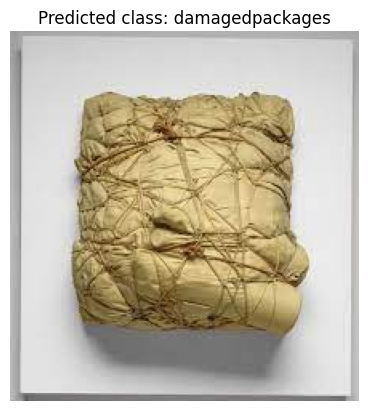

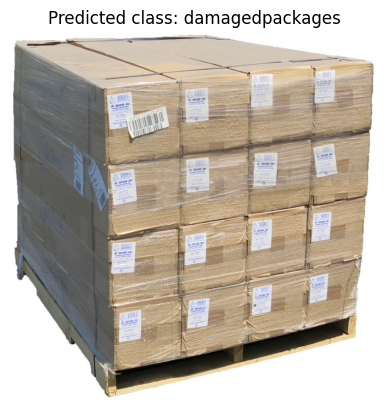

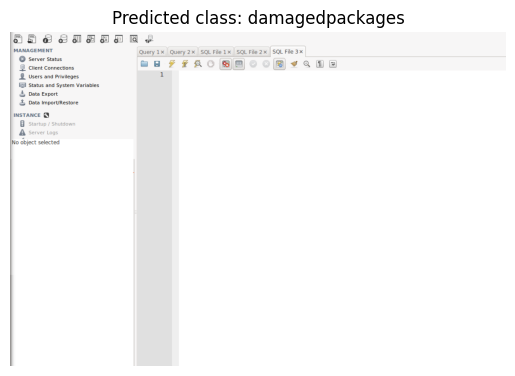

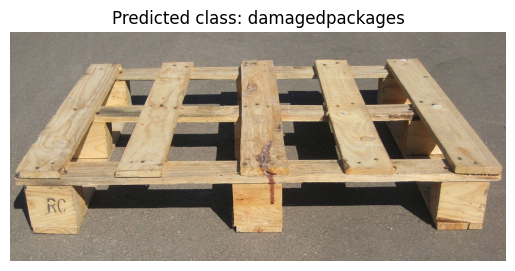

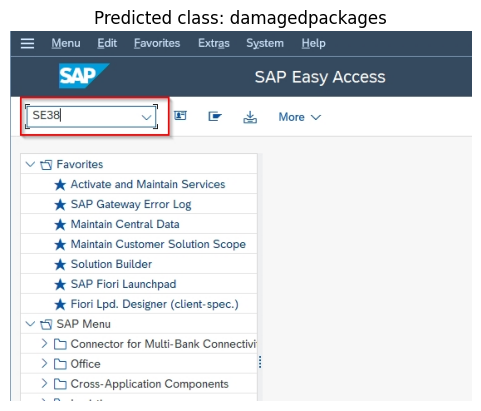

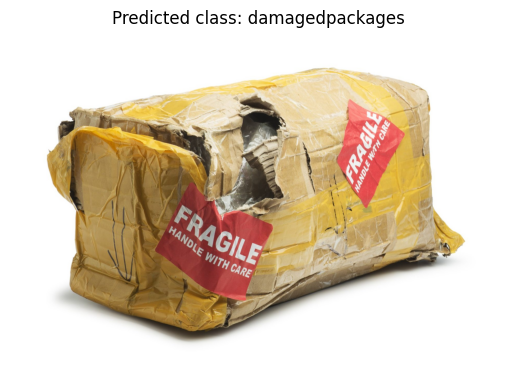

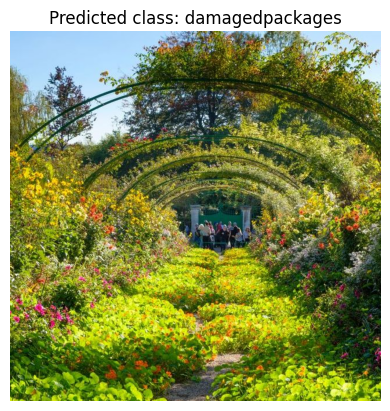

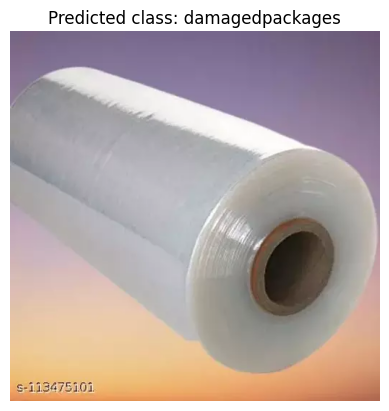

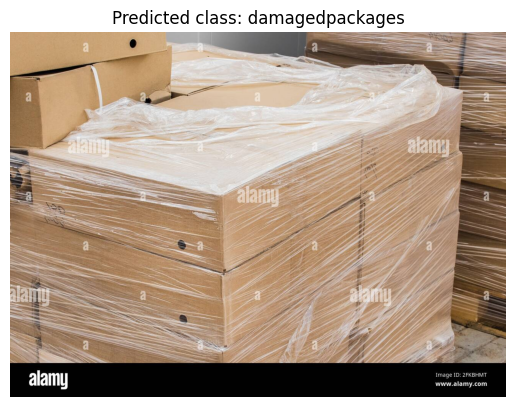

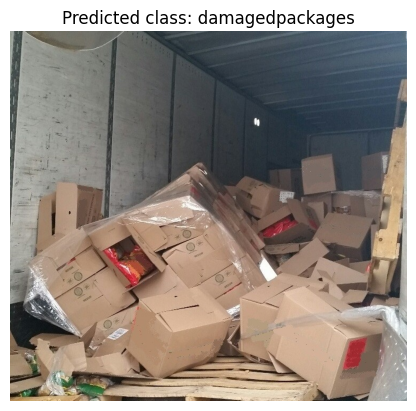

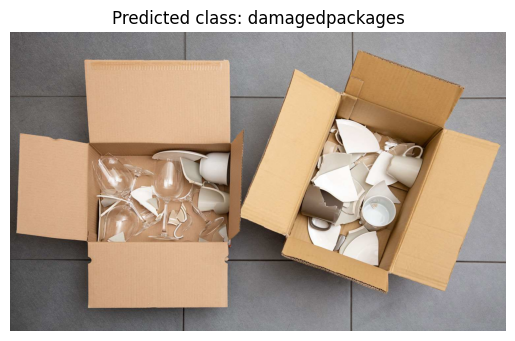

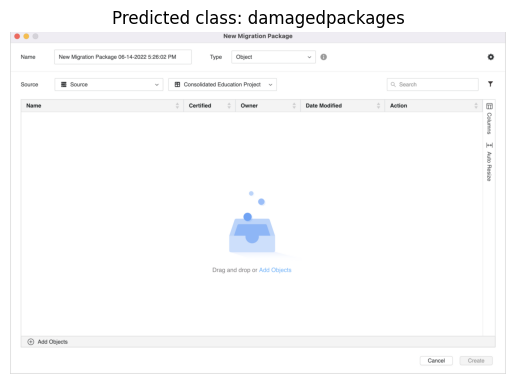

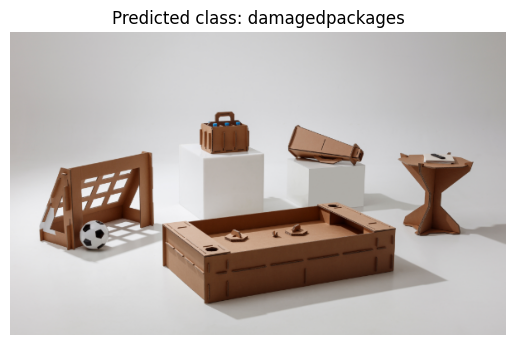

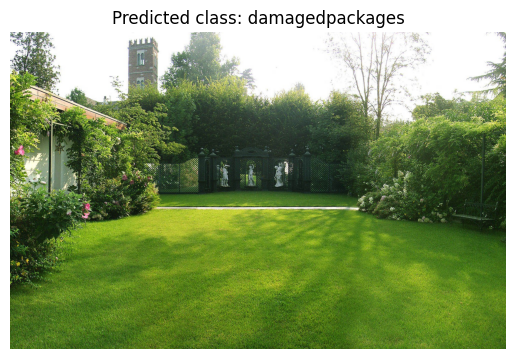

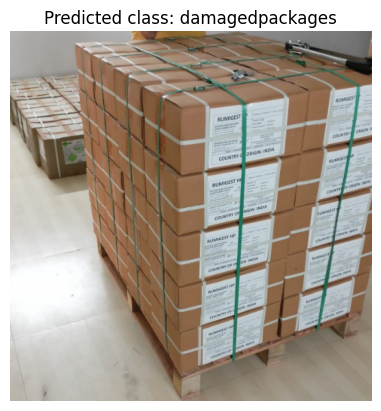

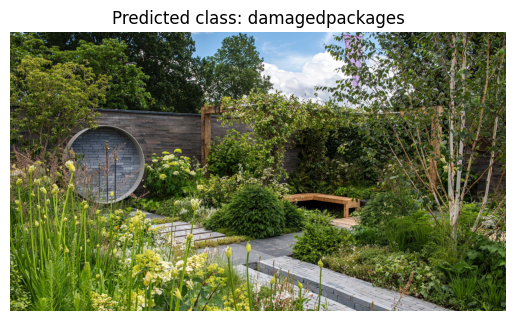

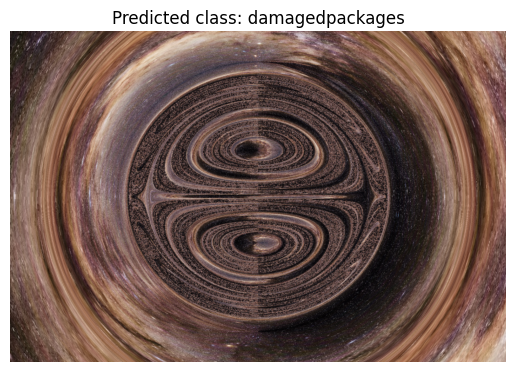

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# ... [Your previous code for predictions]

# Function to display image with prediction
def display_image_with_prediction(image_path, prediction):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(prediction)
    plt.axis('off')  # Turn off axis numbers and labels
    plt.show()

# Parameters
max_display = 30  # Maximum number of images to display
num_displayed = 0

# Loop and display specific images
for i, name in enumerate(image_names):
    class_idx = predicted_classes[i][0]
    class_name = class_indices[class_idx]

    # Display only if the predicted class is 'damagedpackages'
    if class_name == 'damagedpackages':
        img_path = os.path.join(folder_path, name)
        display_image_with_prediction(img_path, f'Predicted class: {class_name}')
        num_displayed += 1

        if num_displayed >= max_display:
            break  # Stop after displaying the specified number of images
